# **Problem Statement**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 




# Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  
import calendar
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df = pd.read_csv("day.csv")

In [3]:
# displaying the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# **Dataset Characteristics**

**day.csv have the following fields:**
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

# Data Understanding

In [4]:
# Checking the shape of the dataset
df.shape

(730, 16)

In [5]:
# Summary of dataset i.e null and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


In [6]:
'''earlier from the info summary we can see that there  are no null values present in the dataset but for cross-checking we are
checking if any null value is present in the dataset.'''
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We can see that there are no null values in our dataset

In [7]:
# Statistical summary of data set
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data Visualization

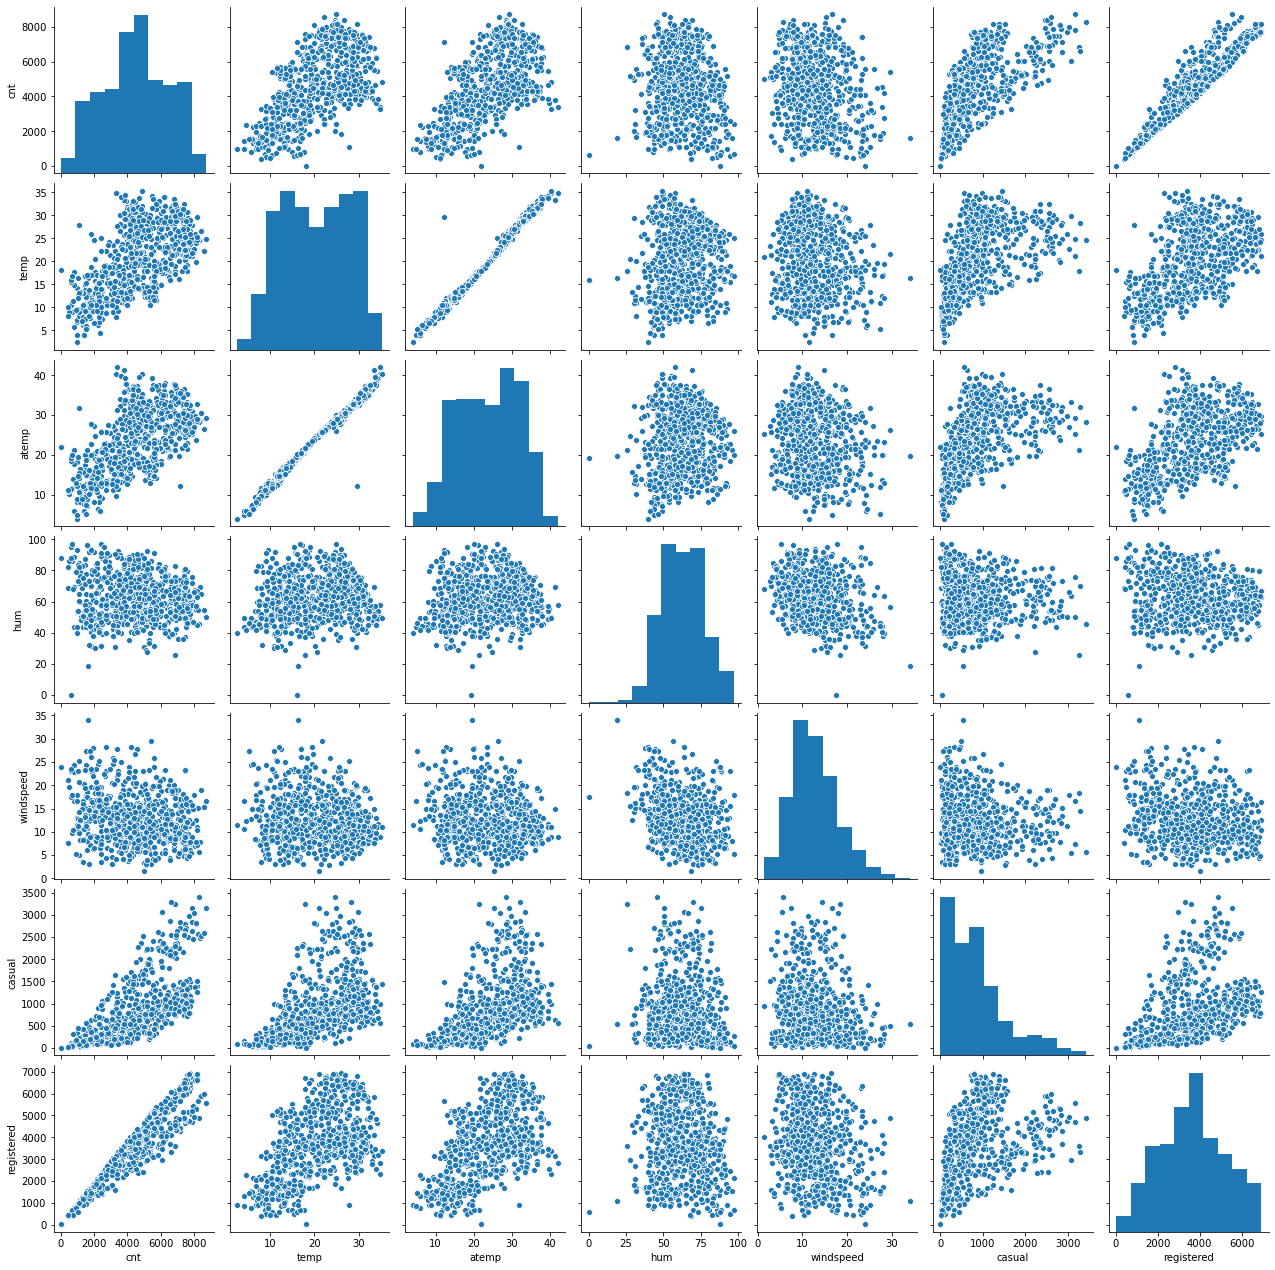

In [8]:
# Pairplot for numeric data
sns.pairplot(data=df, vars=['cnt', 'temp', 'atemp', 'hum','windspeed', 'casual', 'registered'])
plt.show()

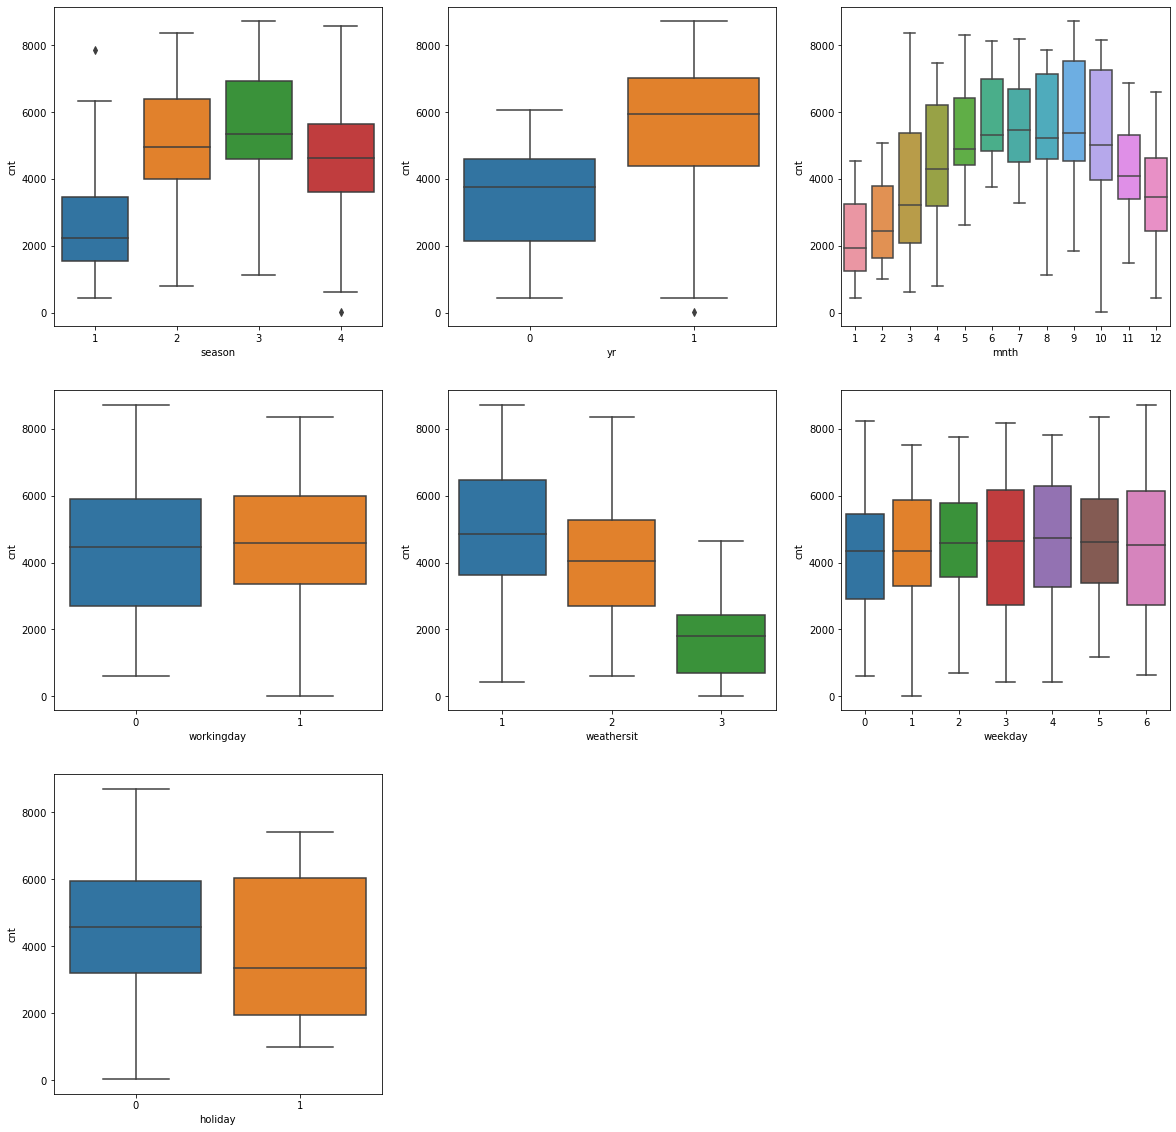

In [9]:
# Visualizing Categorical Data w.r.t the target variable
# there are 7 categorical variables i.e, season, yr, mnth, workingday, weathersit, weekday, holiday
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.show()

**Observation:**

 **Season -**  count of total rental bikes is least in Spring and highest in Fall season. 
 
 **yr -** count of total rental bikes has increased in the year 2019 from 2018.
 
 **mnth -** count of total rental bikes is minm in the month of January and maximum in the month of September
 
 **workingday -** count of total rental bikes is higher on non-working days
 
 **weathersit -** count of total rental bikes is higher for the Clear, Few clouds, Partly cloudy, Partly cloudy weather and                       zero for Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.
 
 **weekday -** Average count of total rental bikes is higher in weekdays 
 
 **holiday -** count of total rental bikes is lesser on holidays.

In [10]:
# checking the columns
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
# Dropping redundant columns
# Dropping dteday because we already have knowledge about weekdays, weekends, holiday, month, yr, workingday
df.drop(['instant', 'dteday','casual','registered'],axis = 1,inplace = True)
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.5 KB


# **Handling Categorical Data**

*Converting required Numerical data to categorical data*

In [13]:
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])
df.season = df.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})
df.weathersit = df.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})
df.weekday = df.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})


In [14]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
# Creating Dummy variables
dummy_var = df[['season','mnth','weekday','weathersit']]
dummy_var = pd.get_dummies(dummy_var, drop_first = True )

# Concatenating dummy_var to original data
df = pd.concat([dummy_var, df],axis = 1)

In [16]:
df

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,Dec,0,Thrusday,1,Mist & Cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,1,0,0,0,1,0,0,0,0,0,...,Dec,0,Friday,1,Mist & Cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,1,0,0,0,1,0,0,0,0,0,...,Dec,0,Saturday,0,Mist & Cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,1,0,0,0,1,0,0,0,0,0,...,Dec,0,Sunday,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


In [17]:
# Checking the columns and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 730 non-null    uint8  
 1   season_Summer                 730 non-null    uint8  
 2   season_Winter                 730 non-null    uint8  
 3   mnth_Aug                      730 non-null    uint8  
 4   mnth_Dec                      730 non-null    uint8  
 5   mnth_Feb                      730 non-null    uint8  
 6   mnth_Jan                      730 non-null    uint8  
 7   mnth_Jul                      730 non-null    uint8  
 8   mnth_Jun                      730 non-null    uint8  
 9   mnth_Mar                      730 non-null    uint8  
 10  mnth_May                      730 non-null    uint8  
 11  mnth_Nov                      730 non-null    uint8  
 12  mnth_Oct                      730 non-null    uint8  
 13  mnth_

In [18]:
## dropping columns to avoid duplicacy
df.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [19]:
df.shape

(730, 30)

In [20]:
df.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


<!--Splitting the dataset into Training and Testing  -->

# **Splitting the dataset into Training and Testing**

In [21]:
train, test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [22]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,19.201653,23.0423,55.8333,12.208807,7534
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,10.489153,11.5850,48.3333,23.500518,1796
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,15.443347,18.8752,48.9583,8.708325,4220


In [23]:
test.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,29.793347,33.27085,63.7917,5.459106,6043
535,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,32.082500,36.04875,59.2083,7.625404,6211
299,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,19.270000,22.85230,81.2917,13.250121,2659
221,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,31.433347,34.24915,42.4167,13.417286,4780
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,29.315000,32.19710,30.5000,19.583229,4968


# **Feature Rescaling**

In [24]:
Scaler = MinMaxScaler()

In [25]:
# Scaling Numerical Variables so tnat it lies between 0 to 1 range.
sc = ['cnt','hum','windspeed','temp','atemp']
train[sc] = Scaler.fit_transform(train[sc])

In [26]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [27]:
# Checking the statistical summary
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Building

In [28]:
# Splitting the training data to X_train & y_train
y_train = train.pop('cnt')
X_train = train

In [29]:
X_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed
653,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794
576,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475


In [30]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [31]:
# Running RFE with the output number of the variable equal to 13
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, 13)             
rfe = rfe.fit(X_train, y_train)

In [32]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 17),
 ('mnth_May', False, 8),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 11),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 10),
 ('weekday_Thrusday', False, 14),
 ('weekday_Tuesday', False, 12),
 ('weekday_Wednesday', False, 15),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [33]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
column = X_train.columns[rfe.support_]
column

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Saturday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [34]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday',
       'workingday', 'atemp'],
      dtype='object')

In [35]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[column]

# Modelling Using *STATS MODEL*

## Model 1

In [36]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [37]:
# Create a first fitted model
slm = sm.OLS(y_train,X_train_rfe).fit()

In [38]:
# Check the parameters obtained
slm.params

const                           0.279640
season_Spring                  -0.056290
season_Summer                   0.052092
season_Winter                   0.098387
mnth_Jul                       -0.057853
mnth_Sep                        0.082751
weekday_Saturday                0.017490
weathersit_Light Snow & Rain   -0.239456
weathersit_Mist & Cloudy       -0.054750
yr                              0.229791
holiday                        -0.094469
temp                            0.530609
hum                            -0.168105
windspeed                      -0.183143
dtype: float64

In [39]:
# summary of the linear regression model obtained
print(slm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          7.51e-190
Time:                        22:57:11   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     496   BIC:                            -934.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

dropping weekday_Saturday since it has p > 0.05

In [40]:
X_train_new = X_train_rfe.drop(["weekday_Saturday"], axis = 1)

## Model 2

In [41]:
# Adding a constant variable 
X_train_lr = sm.add_constant(X_train_new)

In [42]:
lr = sm.OLS(y_train,X_train_lr).fit() 

In [43]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.69e-190
Time:                        22:57:12   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2841      0.034      8.242      0.000       0.216       0.352
season_Spring                   -0.0562      0.021     -2.695      0.007      -0.097      -0.015
season_Summer                    0.0519      0.015      3.457      0.001       0.022       0.081
season_Winter                    0.0987      0.017      5.719      0.000       0.065       0.133
mnth_Jul                        -0.0575      0.018     -3.140      0.002      -0.094      -0.022
mnth_Sep                         0.0830      0.017      4.962      0.000       0.050       0.116
weathersit_Light Snow & Rain    -0.2382      0.026     -9.034      0.000      -0.290      -0.186
weathersit_Mist & Cloudy        -0.0542      0.011     -5.151      0.000      -0.075      -0.034
yr                               0.2293      0.008     28.219      0.000       0.213       0.245
holiday                         -0.0974      0.026     -3.809      0.000      -0.148      -0.047
temp                             0.5300      0.034     15.739      0.000       0.464       0.596
hum                             -0.1710      0.038     -4.526      0.000      -0.245      -0.097
windspeed                       -0.1819      0.026     -7.066      0.000      -0.233      -0.131
==============================================================================
Omnibus:                       57.560   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.574
Skew:                          -0.610   Prob(JB):                     2.69e-29
Kurtosis:                       5.169   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Checking VIF for multicollinearity

In [44]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.38
1,season_Spring,5.02
10,temp,3.61
3,season_Winter,3.49
2,season_Summer,2.61
11,hum,1.90
7,weathersit_Mist & Cloudy,1.56
4,mnth_Jul,1.48
5,mnth_Sep,1.30
6,weathersit_Light Snow & Rain,1.24


Higher VIF means More Linearly Correlated Feature means Multicollinearity.
TO avoid multicollinearity we drop the parameter with high VIF.
We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

In [45]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [46]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,hum,28.06
9,temp,16.02
11,windspeed,4.65
0,season_Spring,4.01
2,season_Winter,3.35
1,season_Summer,2.78
6,weathersit_Mist & Cloudy,2.28
7,yr,2.08
3,mnth_Jul,1.58
4,mnth_Sep,1.38


In [47]:
# dropping hum from the model
X_train_new = X_train_new.drop(['hum'], axis=1)

# Final Model

In [48]:
# Adding a constant variable 
X_train_lr = sm.add_constant(X_train_new)

# Create a first fitted model
slm = sm.OLS(y_train,X_train_lr).fit()   

In [49]:
# Check the summary
print(slm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.40e-187
Time:                        22:57:12   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [50]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
1,season_Summer,2.21
0,season_Spring,2.08
7,yr,2.07
2,season_Winter,1.79
3,mnth_Jul,1.58
6,weathersit_Mist & Cloudy,1.55
4,mnth_Sep,1.34
5,weathersit_Light Snow & Rain,1.08


# Residual Analysis of the training data

In [51]:
y_train_cnt = slm.predict(X_train_lr)

Text(0.5, 0, 'Errors')

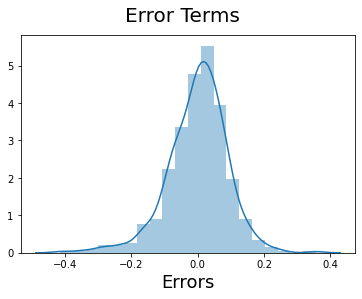

In [52]:
# Plot the histogram the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18)   

Error terms are normally distributed and has mean value aroud zero which satisfies the assumptions of linear regression.

# Predictions Using the Final Model

We have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

### Scaling test set

In [53]:
num_vars = ['cnt','hum','windspeed','temp','atemp']

test[num_vars] = Scaler.transform(test[num_vars])

In [54]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


### Splitting test set into X_test and Y_test

In [55]:
y_test = test.pop('cnt')
X_test = test

In [56]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [57]:
# predicting using values used by the final model
test_col = X_train_lr.columns
X_test=X_test[test_col[1:]]

In [58]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Spring                 219 non-null    uint8  
 2   season_Summer                 219 non-null    uint8  
 3   season_Winter                 219 non-null    uint8  
 4   mnth_Jul                      219 non-null    uint8  
 5   mnth_Sep                      219 non-null    uint8  
 6   weathersit_Light Snow & Rain  219 non-null    uint8  
 7   weathersit_Mist & Cloudy      219 non-null    uint8  
 8   yr                            219 non-null    int64  
 9   holiday                       219 non-null    int64  
 10  temp                          219 non-null    float64
 11  windspeed                     219 non-null    float64
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


# Model Evaluation

In [59]:
y_pred = slm.predict(X_test)

In [60]:
# Checking R2 for test set
r2_score(y_test, y_pred)

0.8049418440982381

***R2 value is 0.804941 and this is considered as good model as it is near to 1.***

In [61]:
# Calculating MSE for test_set
mse = mean_squared_error(y_test, y_pred)
mse

0.009264444750858145

**MSE IS 0.09264444750858145 which is mostly near zero that means model is nearly perfect.**

### Plotting y_test and y_pred for better understanding

Text(0, 0.5, 'y_pred')

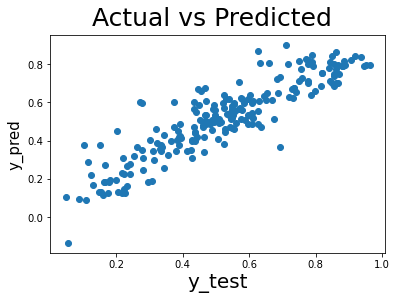

In [62]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('Actual vs Predicted', fontsize = 25)              
plt.xlabel('y_test', fontsize = 20)                          
plt.ylabel('y_pred', fontsize = 15)

In [63]:
par = pd.DataFrame(slm.params)
par.insert(0,'Variables',par.index)
par.rename(columns = {0:'Coefficient value'},inplace = True)
par['index'] = list(range(0,12))
par.set_index('index',inplace = True)
par.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
par

,Variables,Coefficient value
index,,
10,temp,0.491508
8,yr,0.233482
0,const,0.199648
3,season_Winter,0.083084
5,mnth_Sep,0.076686
2,season_Summer,0.045280
4,mnth_Jul,-0.052418
1,season_Spring,-0.066942
7,weathersit_Mist & Cloudy,-0.081558


## Best Fitted Line Equation-:
**cnt  =  0.199648 + 0.491508 X temp + 0.233482 X yr + 0.083084 X seasonWinter  + 0.045280 X season_Summer - 0.066942 X season_Spring - 0.052418 X mnth_Jul + 0.076686 X mnth_Sep - 0.285155 X weathersit_Light Snow & Rain - 0.081558 X weathersit_Mist & Cloudy - 0.098013 X holiday - 0.147977 X windspeed**

# Interpretation

**.** Positive coefficients indicates that rise in these values will lead to increment in the count of total numbers of rental bike(cnt).
        
**.** Wherein, Negative Coeffecients indicate that rise in these values will cause decrement in the count of total numbers of rental bike(cnt) .

**.** Temp is the most significant as it has the highest coefficient.

**.** count of total rental bikes is lesser on holidays.

**.**  Count of total rental bikes is higher in the month of September.

**.** R2 value is 0.804941 and this is considered as good model as it is near to 1.

**.** MSE IS 0.09264444750858145 which is mostly near zero that means model is nearly perfect.

**.** Error terms are normally distributed and has mean value aroud zero which satisfies the assumptions of linear regression.

**.** There is no multicollinearity in the data